# Exercise 1

Plot the function

$$
f(x) = \cos(\pi \theta x) \exp(-x)
$$

over the interval $ [0, 5] $ for each $ \theta $ in `np.linspace(0, 2, 10)`.

Place all the curves in the same figure.

The output should look like this

![](matplotlib_ex1.png)

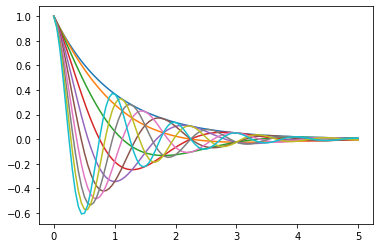

In [11]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0, 2, 10)
x = np.linspace(0, 5, 100)

fig, ax = plt.subplots()
for t in theta:
    y = (np.cos(np.pi * t * x) * np.exp(-x))
    ax.plot(x, y)
    
plt.show()

# Exercise 2

Reproduce the plot below:

![](federer.png)

Given the `data/tennis.csv` file.

Note that the y axis is the ration of `double faults` that Federer did over his `total points total` in a match

In [58]:
#df.resample("M", how='mean')
#g = df.groupby(pd.Grouper(freq="M"))
#g.mean()

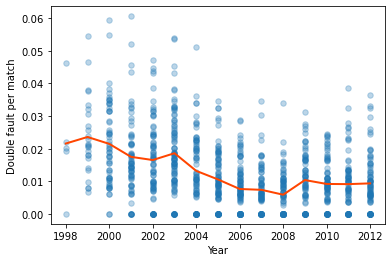

In [238]:
import pandas as pd
df = pd.read_csv("data/tennis.csv")
#df['start date'] = pd.to_datetime(df['start date'])
#df = df.set_index('start date')

df['dfpm'] = df['player1 double faults'] / df['player1 total points total']

#x = df['start date']
#m = df.groupby(pd.Grouper(freq="M")).mean()
#y = m.dfpm

#x = df['start date']
x = df['year']
y = df.dfpm
avg = df.groupby('year').dfpm.mean()

fig, ax = plt.subplots()

ax.scatter(x, y, s=30, alpha=0.3)
ax.plot(avg, '-', linewidth=2, color='orangered')
ax.set_xlabel('Year')
ax.set_ylabel('Double fault per match')

plt.show()

# Exercise 3

With these imports:

```python
import datetime as dt
from pandas_datareader import data
```

If needed, install the datareader with

```
!pip install --upgrade pandas-datareader
```

Write a program to calculate the percentage price change over 2019 for the following shares:

```python
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}
```               

Here’s the first part of the program:

```python
def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)
```

Complete the program to plot the result as a bar graph like this one for each:

![](pandas_share_prices.png)


In [272]:
import datetime as dt
from pandas_datareader import data

ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}

def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

#indices = list(indices_list.values())
ticker = read_data(ticker_list)

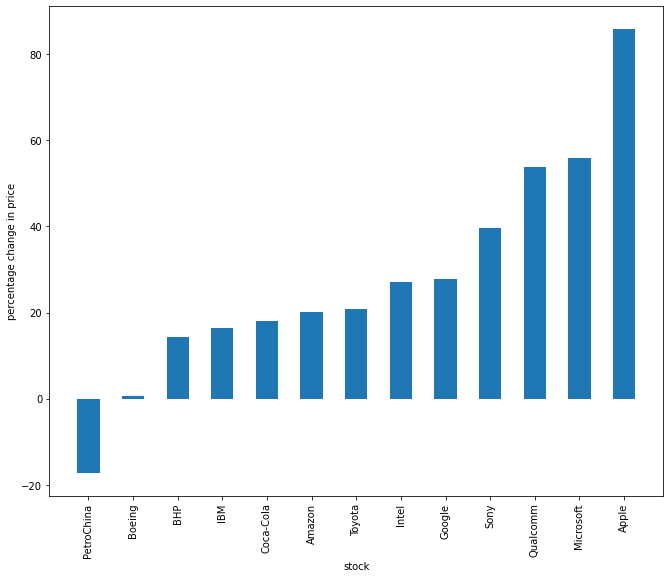

In [267]:
pcy = ((ticker.iloc[-1] - ticker.iloc[0]) / ticker.iloc[0] * 100).sort_values()
#pcy.plot(kind='bar')

fig, ax = plt.subplots(figsize=(11, 9))
ax.bar([ticker_list[x] for x in pcy.index], pcy, width=0.5)
ax.set_xlabel('stock')
ax.set_ylabel('percentage change in price')
plt.xticks(rotation=90)
plt.show()

# Exercise 4

Using the method `read_data` introduced in Exercise 1, write a program to obtain year-on-year percentage change for the following indices:

```
indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}
```

Complete the program to show summary statistics and plot the result as a time series graph like this one:

![](pandas_indices_pctchange.png)

In [325]:
indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}

labels = list(indices_list.values())
# for some reason dates inferior to 1970 return an error
indices = read_data(indices_list, start=dt.datetime(1970, 1, 1), end=dt.datetime(2020, 1, 1))  

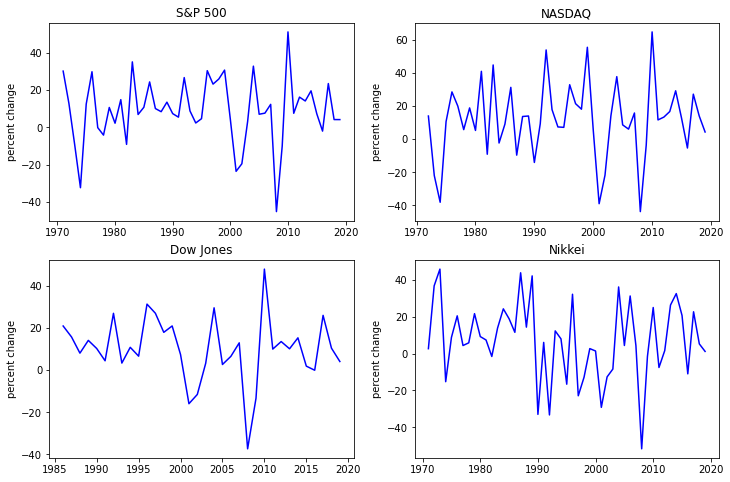

In [326]:
num_rows, num_cols = 2, 2
fig, ax = plt.subplots(num_rows, num_cols, figsize=(12, 8))

k = 0
for i in range(num_rows):
    for j in range(num_cols):
        keys = list(indices_list.keys())[k]
        col = indices[keys].dropna()
        col = col.groupby(col.index.year).min()
        col2 = col.shift(periods=1, axis=0)
        pct = (col - col2) / col2 * 100
        ax[i, j].plot(pct, 'b-')
        ax[i, j].set_title(labels[k])
        ax[i, j].set_ylabel('percent change')
        k += 1
plt.show()

# Exercise 5: Multi Plot

Recall exercise 2's plot.

Make the same plot tracking double faults over time, except make one such plot for each surface type (indoor hard, outdoor clay, etc.)

Have all 6 plots (one per surface type) be in the same matplotlib figure together, similar to the plot we saw in part 4 of the lecture.

In [221]:
import pandas as pd
df = pd.read_csv("data/tennis.csv")

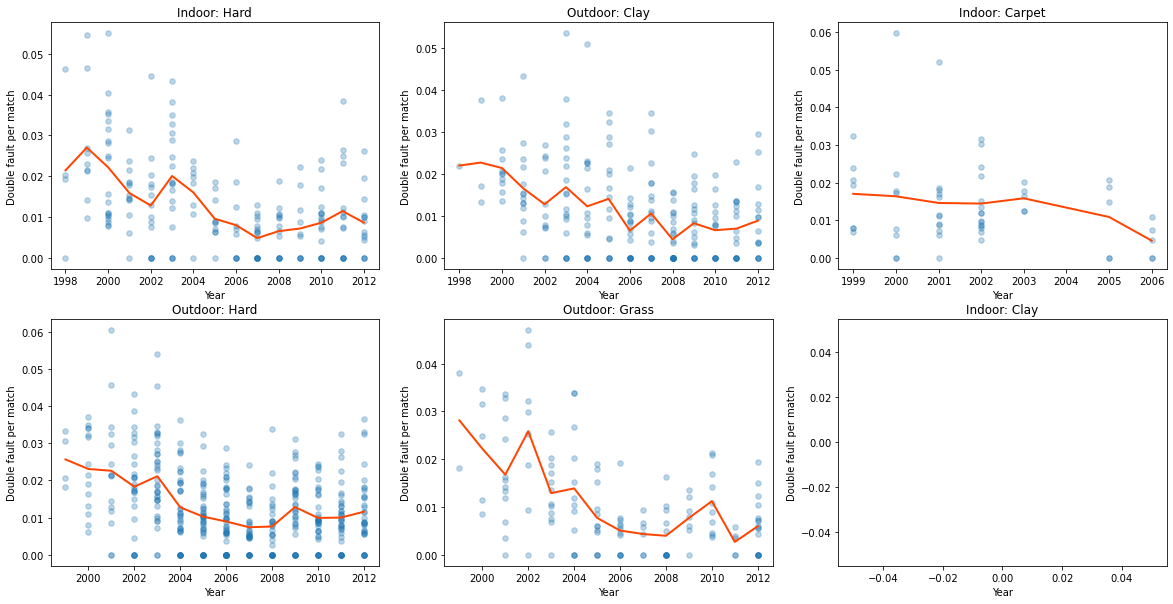

In [269]:
df['dfpm'] = df['player1 double faults'] / df['player1 total points total']
surfaces = df.surface.unique()
k = 0

num_rows, num_cols = 2, 3
fig, ax = plt.subplots(num_rows, num_cols, figsize=(20, 10))

for i in range(num_rows):
    for j in range(num_cols):
        tmp = df.loc[df.surface == surfaces[k]]
        x = tmp.year
        y = tmp.dfpm
        avg = tmp.groupby('year').dfpm.mean()

        ax[i, j].scatter(x, y, s=30, alpha=0.3)
        ax[i, j].plot(avg, '-', linewidth=2, color='orangered')
        ax[i, j].set_title(surfaces[k])
        ax[i, j].set_xlabel('Year')
        ax[i, j].set_ylabel('Double fault per match')

        k += 1
plt.show()

In [231]:
# no data for Indoor : Clay surface
df.loc[df.surface == surfaces[5]] 

,year,tournament,start date,type,surface,draw,atp points,atp ranking,tournament prize money,round,...,player2 break points converted total,player2 return games played,player2 total service points won,player2 total service points total,player2 total return points won,player2 total return points total,player2 total points won,player2 total points total,win,dfpm
266,2002,"RUS v SUI WG Rd 1, Moscow, Russia",2002-02-08,DC,Indoor: Clay,Draw: 4,NaN,13.0,$,RR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
267,2002,"RUS v SUI WG Rd 1, Moscow, Russia",2002-02-08,DC,Indoor: Clay,Draw: 4,NaN,13.0,$,RR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
455,2004,"ROM v. SUI WG 1st RD, Romania",2004-02-06,DC,Indoor: Clay,Draw: 4,NaN,1.0,$,RR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
456,2004,"ROM v. SUI WG 1st RD, Romania",2004-02-06,DC,Indoor: Clay,Draw: 4,NaN,1.0,$,RR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
474,2005,"SUI vs. GBR WG PO, Geneva, Switzerland",2005-09-23,DC,Indoor: Clay,Draw: 4,NaN,1.0,$,RR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
1168,2012,"SUI vs. USA WG 1st RD, Switzerland",2012-02-10,DC,Indoor: Clay,Draw: 4,NaN,3.0,NaN,RR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
